# Kaggle: Housing Price competition

This notebook's goal is to predict the price for each house in the Kaggle test set, through the variable SalePrice.

Metrics :

>Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

# Import the library

In [34]:
import tensorflow as tf
import ydf   # Yggdrasil Decision Forests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

In [25]:
all_ds = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
all_ds.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploratory Data Analysis
**Goal** : Understand data EDA can be begin on the Kaggle website in the Data tab.

**Form**:

* **Target variable** : SalePrice
* **Lines and columns** : 1460 rows × 81 columns
* **Variables' type** : 38 numerical, 43 object
* **Missings data** :In the housing dataset, some variables have many NaN values. But when we look into the variable descriptions and the context, we realize the house does not have that feature at all.

**Content** :

Target visualisation : IQR = 163,000 [129,975 ; 214,000]. Some outliers, in particular after 500,000.

## Inspect the types of feature columns

In [26]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 1416 to 1115
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    959 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          72 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuilt 

In [27]:
all_ds.dtypes.value_counts()


object     43
int64      35
float64     3
Name: count, dtype: int64

In [28]:
print(all_ds.shape)

(1460, 81)


## Sales price visualization

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

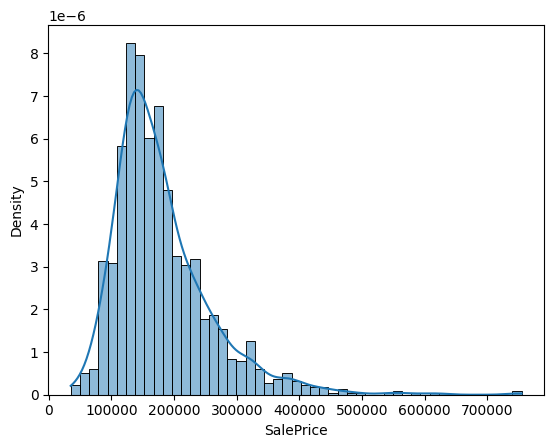

In [29]:
 sns.histplot(all_ds['SalePrice'], kde=True, stat="density")


In [35]:
all_ds['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: >

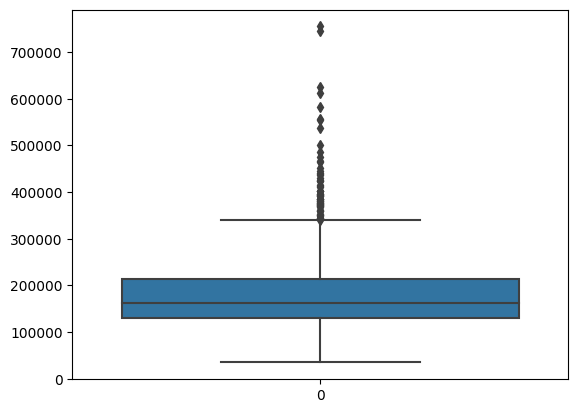

In [36]:
sns.boxplot(data=all_ds['SalePrice'])


## Randomly split the dataset into a training (70%) and testing (30%) dataset


In [30]:
##drop the Id column as it is not necessary for model training
all_ds = all_ds.drop('Id', axis=1)
all_ds = all_ds.sample(frac=1)
split_idx = len(all_ds) * 8 // 10
train_ds = all_ds.iloc[:split_idx]
test_ds = all_ds.iloc[split_idx:]

print(len(train_ds))
print(len(test_ds))

1168
292


# Train a model

In [31]:
train_ds_num = train_ds.select_dtypes(include = ['float64', 'int64'])

model = ydf.GradientBoostedTreesLearner(label="SalePrice",task=ydf.Task.REGRESSION).train(train_ds_num)



Train model on 1168 examples
Model trained in 0:00:01.159429


In [32]:
evaluation = model.evaluate(test_ds)
print(evaluation)


evaluation

RMSE: 30841.2
num examples: 292
num examples (weighted): 292



Evaluation()

In [33]:
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
ids = test_data.pop('Id') # Save the Id column

# Predict using your trained model
preds = model.predict(test_data)


# Create submission DataFrame
submission = pd.DataFrame({
    "Id": ids,
    "SalePrice": preds
})

# Preview the submission file
print(submission.head())

# Save to CSV (for Kaggle submission)
submission.to_csv("submission.csv", index=False)

     Id      SalePrice
0  1461  128717.328125
1  1462  149708.546875
2  1463  177218.984375
3  1464  187913.203125
4  1465  192748.109375
